# Installing Dependancies


In [1]:
import gpxpy
import gpxpy.gpx

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

from geopy.distance import distance
from geopy.distance import geodesic
from geopy import distance
import math

import haversine as hs
from haversine import Unit
import numpy as np

import datetime
from time import strftime
from time import gmtime



plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

In [2]:

with open('Routes/my_runs/DD100K_2021.gpx', 'r') as gpx_file:
    DDgpx = gpxpy.parse(gpx_file)

In [3]:
DDgpx

GPX(tracks=[GPXTrack(name='Prince William County Trail Running', segments=[GPXTrackSegment(points=[...])])])

In [4]:
DDgpx.get_track_points_no()

59640

# Loading a GPX file


In [5]:
# Loading a GPX file
with open('Routes//my_runs/2-loop_mtvernon.gpx', 'r') as gpx_file:
    loop2gpx = gpxpy.parse(gpx_file)

In [6]:

print(loop2gpx.get_track_points_no())
print(loop2gpx.get_elevation_extremes())
print(loop2gpx.get_uphill_downhill())
print('# of tracks - ',len(loop2gpx.tracks))
print('# of segments - ',len(loop2gpx.tracks[0].segments))

4304
MinimumMaximum(minimum=-27.200000762939453, maximum=28.399999618530273)
UphillDownhill(uphill=284.19998838156533, downhill=302.59998800009583)
# of tracks -  1
# of segments -  1


In [7]:
# making a dictionary that can be converted to Pandas Dataframe
route_info=[]

for track in loop2gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            route_info.append({
                'time': point.time,
                'latitude': point.latitude,
                'longitude':point.longitude,
                'elevation': point.elevation
            })

route_info[:3]

[{'time': datetime.datetime(2021, 11, 19, 14, 52, 53, tzinfo=SimpleTZ("Z")),
  'latitude': 38.79649353213608,
  'longitude': -77.04552322626114,
  'elevation': -3.0},
 {'time': datetime.datetime(2021, 11, 19, 14, 52, 54, tzinfo=SimpleTZ("Z")),
  'latitude': 38.79648883827031,
  'longitude': -77.04551886767149,
  'elevation': -3.0},
 {'time': datetime.datetime(2021, 11, 19, 14, 52, 55, tzinfo=SimpleTZ("Z")),
  'latitude': 38.796473080292344,
  'longitude': -77.04550998285413,
  'elevation': -3.0}]

In [8]:
df = pd.DataFrame(route_info)
df.head()

,time,latitude,longitude,elevation
0,2021-11-19 14:52:53+00:00,38.796494,-77.045523,-3.0
1,2021-11-19 14:52:54+00:00,38.796489,-77.045519,-3.0
2,2021-11-19 14:52:55+00:00,38.796473,-77.045510,-3.0
3,2021-11-19 14:52:56+00:00,38.796457,-77.045503,-3.0
4,2021-11-19 14:52:57+00:00,38.796427,-77.045499,-2.8


# Create Simple BASE CSV file


In [9]:

# df.to_csv('data/dd100k.csv', index=False)

# Simple plots


## Plot the Route


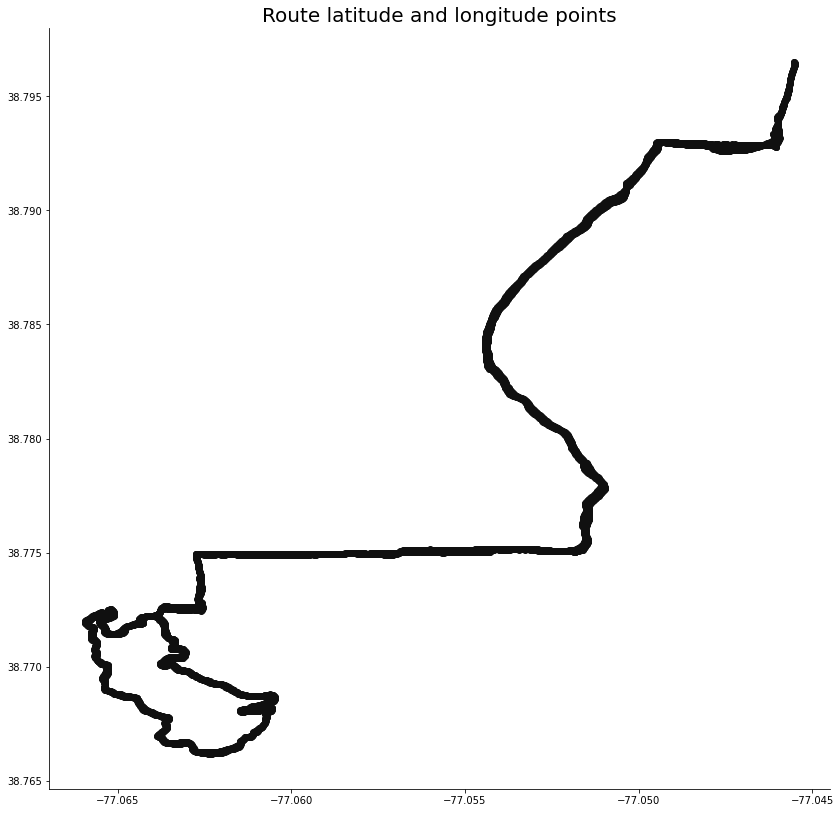

In [10]:
plt.figure(figsize=(14, 14))
plt.scatter(df['longitude'], df['latitude'], color='#101010')
plt.title('Route latitude and longitude points', size=20);

## Plot the Elevation


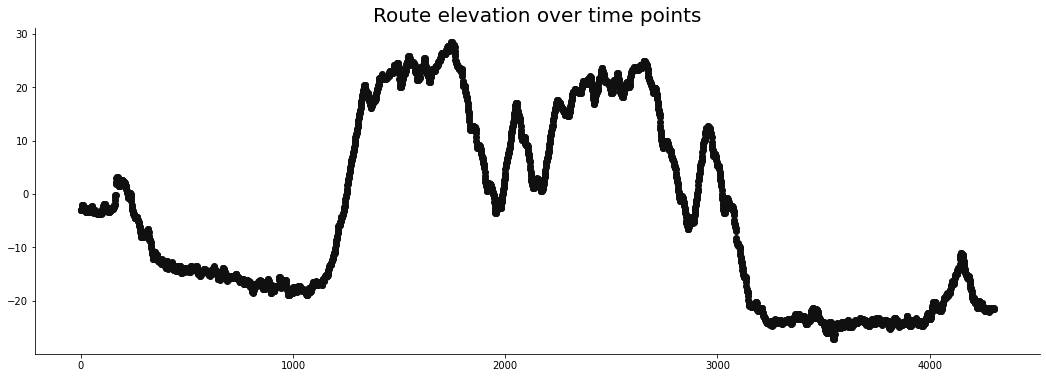

In [11]:
plt.figure(figsize=(18,6))
plt.scatter(df.index, df['elevation'], color='#101010')
plt.title('Route elevation over time points', size=20);

In [12]:
pointxyz = []
for i in range(0,len(df)):
    pointxyz.append((df['latitude'][i], df['longitude'][i], df['elevation'][i]))

pointxyz[0]

(38.79649353213608, -77.04552322626114, -3.0)

In [13]:
df['pointxyz']= pd.Series(pointxyz)
df.head()

,time,latitude,longitude,elevation,pointxyz
0,2021-11-19 14:52:53+00:00,38.796494,-77.045523,-3.0,"(38.79649353213608, -77.04552322626114, -3.0)"
1,2021-11-19 14:52:54+00:00,38.796489,-77.045519,-3.0,"(38.79648883827031, -77.04551886767149, -3.0)"
2,2021-11-19 14:52:55+00:00,38.796473,-77.045510,-3.0,"(38.796473080292344, -77.04550998285413, -3.0)"
3,2021-11-19 14:52:56+00:00,38.796457,-77.045503,-3.0,"(38.79645690321922, -77.04550285823643, -3.0)"
4,2021-11-19 14:52:57+00:00,38.796427,-77.045499,-2.8,"(38.796427231281996, -77.04549883492291, -2.79..."


# Distance Calcs


## Geodesic


In [14]:
b_latlon = df['pointxyz'][1+1][:2]
a_latlon = df['pointxyz'][1][:2]
print(b_latlon,a_latlon)
print(geodesic(a_latlon,b_latlon).miles)

(38.796473080292344, -77.04550998285413) (38.79648883827031, -77.04551886767149)
0.0011880841825531274


In [15]:
# # Get Step distance, i.e. distance between points.
# euc_dist = [0]
# # fl_dist =[0]

# for i in range(len(df)-1):
    
#     b_latlon = df['pointxyz'][i+1][:2]
#     a_latlon = df['pointxyz'][i][:2]

#     # OG elevation in meters (1000m = .6 miles)  so change meters into km and then convert to miles
#     b_elv = df['pointxyz'][i+1][2]/1000*.6
#     a_elv = df['pointxyz'][i][2]/1000*.6
#     eldiff = b_elv-a_elv

#     flat_distance =geodesic(a_latlon,b_latlon).miles
#     # fl_dist.append(flat_distance)

#     euc_distance = math.sqrt(flat_distance**2 + eldiff**2)
#     euc_dist.append(euc_distance)

# df['euc_dist'] = pd.Series(euc_dist)
# # df['flat_dist'] = pd.Series(fl_dist)

# df.head()


## Haversine


In [16]:
def haversine_distance(lat1, lon1, lat2, lon2) -> float:
    distance = hs.haversine(
        point1=(lat1,lon1),
        point2=(lat2,lon2),
        unit=hs.Unit.MILES
    )
    return np.round(distance,8)

In [17]:
haversine_distance(
    lat1=df.iloc[0]['latitude'],
    lon1=df.iloc[0]['longitude'],
    lat2=df.iloc[1]['latitude'],
    lon2=df.iloc[1]['longitude']
)

0.00040034

In [18]:
# clean up errors in speed by capping distance traveled in 1 sec to be = cap_mph miles per hour
distances = [np.nan]
cap_mph = 10
distance_cap = 1/(60/cap_mph*60)

for i in range(len(df)):
    if i == 0:
        continue
    else:
        unit_dist = haversine_distance(
            lat1=df.iloc[i - 1]['latitude'],
            lon1=df.iloc[i - 1]['longitude'],
            lat2=df.iloc[i]['latitude'],
            lon2=df.iloc[i]['longitude']
        )
        if unit_dist > distance_cap:
            distances.append(np.nan)
        else:
            distances.append(unit_dist)

df['distance'] = distances


In [19]:
df['distance'].sum()
# df.distance.describe()
df['distance'][740:745]

740    0.002426
741    0.002253
742    0.002207
743    0.002205
744    0.002421
Name: distance, dtype: float64

In [20]:
df['distance'] = df['distance'].interpolate().fillna(0)

#### Speed Calc


In [21]:
# 1 sec is 1/60th of minute and a minute is 1/60th of an hour so 

speed = []

for i in range(len(df)):
    mph = df['distance'][i]/(1/60/60)
    speed.append(mph)

df['mph'] = pd.Series(speed)



In [22]:
df['mph'].describe()
df[df['mph'].isna()]
df['mph'][740:745]

740    8.734104
741    8.109252
742    7.945200
743    7.937352
744    8.714088
Name: mph, dtype: float64

In [23]:
df['mph'].describe()

count    4304.000000
mean        6.932480
std         1.584471
min         0.000000
25%         6.024303
50%         7.282188
75%         8.030961
max         9.995904
Name: mph, dtype: float64

In [24]:
# Pace
pace =[]
sec_mile_pace = []
for i in range(len(df)):
    if df['distance'][i] == 0:
        pace.append(0)
        sec_mile_pace.append(0)
    else:
        pace.append(str(datetime.timedelta(seconds=(1/df['distance'][i]))))
        sec_mile_pace.append((1/df['distance'][i]))

df['pace'] = pd.Series(pace)
df['sec_mile_pace'] = pd.Series(sec_mile_pace)


        

#### Elevation Change, Cum Elevation, and Cum Distance


In [25]:
df['elevation_change'] = df['elevation'].diff()
df['cum_elevation'] = df['elevation_change'].cumsum()
df['cum_distance'] = df['distance'].cumsum()
df = df.fillna(0)
df.head()


,time,latitude,longitude,elevation,pointxyz,distance,mph,pace,sec_mile_pace,elevation_change,cum_elevation,cum_distance
0,2021-11-19 14:52:53+00:00,38.796494,-77.045523,-3.0,"(38.79649353213608, -77.04552322626114, -3.0)",0.000000,0.000000,0,0.000000,0.0,0.0,0.000000
1,2021-11-19 14:52:54+00:00,38.796489,-77.045519,-3.0,"(38.79648883827031, -77.04551886767149, -3.0)",0.000400,1.441224,0:41:37.876805,2497.876805,0.0,0.0,0.000400
2,2021-11-19 14:52:55+00:00,38.796473,-77.045510,-3.0,"(38.796473080292344, -77.04550998285413, -3.0)",0.001189,4.281336,0:14:00.859022,840.859022,0.0,0.0,0.001590
3,2021-11-19 14:52:56+00:00,38.796457,-77.045503,-3.0,"(38.79645690321922, -77.04550285823643, -3.0)",0.001182,4.254264,0:14:06.209826,846.209826,0.0,0.0,0.002771
4,2021-11-19 14:52:57+00:00,38.796427,-77.045499,-2.8,"(38.796427231281996, -77.04549883492291, -2.79...",0.002062,7.421580,0:08:05.071912,485.071912,0.2,0.2,0.004833


In [29]:
# range of elevation 
df.describe()

,latitude,longitude,elevation,distance,mph,sec_mile_pace,elevation_change,cum_elevation,cum_distance,second
count,4304.000000,4304.000000,4304.000000,4304.000000,4304.000000,4304.000000,4304.000000,4304.000000,4304.000000,4304.000000
mean,38.776891,-77.057857,-3.665892,0.001926,6.932480,599.728588,-0.004275,-0.665892,4.156972,2151.500000
std,0.008550,0.006189,17.281843,0.000440,1.584471,924.760747,0.222090,17.281843,2.303595,1242.602108
min,38.766160,-77.065959,-27.200001,0.000000,0.000000,0.000000,-1.200000,-24.200001,0.000000,0.000000
25%,38.770136,-77.063445,-18.600000,0.001673,6.024303,448.238032,-0.199999,-15.600000,2.320818,1075.750000
50%,38.774916,-77.060646,-6.600000,0.002023,7.282188,494.331257,0.000000,-3.600000,4.153441,2151.500000
75%,38.782989,-77.052164,12.800000,0.002231,8.030961,597.467931,0.199999,15.800000,6.047302,3227.250000
max,38.796494,-77.045499,28.400000,0.002777,9.995904,42372.881356,2.000000,31.400000,8.288165,4303.000000


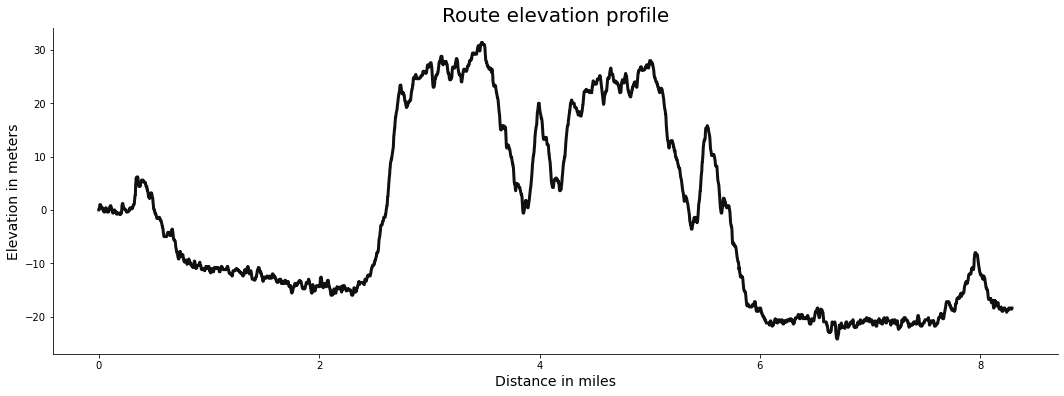

In [30]:
plt.figure(figsize=(18,6))
plt.plot(df['cum_distance'], df['cum_elevation'], color='#101010', lw=3)
plt.title('Route elevation profile', size=20)
plt.xlabel('Distance in miles', size=14)
plt.ylabel('Elevation in meters', size=14);

In [31]:
# df['5sec_rolling_elv'] = df['elevation_change'].rolling(5).mean()
df['second'] = df.index
# df[10:15]

In [32]:
# seconds to time

# alternatively
# strftime("%H:%M:%S", gmtime(3905))
# '00:11:06'

def sec_2_time(seconds):
    str_time = str(datetime.timedelta(seconds=seconds))
    return str_time
sec_2_time(3905)



'1:05:05'

In [35]:
# Adding Elapsed Time
def elapsed_time(row):
    time = str(datetime.timedelta(seconds=row['second']))
    return time

df['elapsed_time']= df.apply(elapsed_time, axis=1)

# Adding steps/distance in feet
df['step_feet'] = df['distance'] * 5280
df.head()


,time,latitude,longitude,elevation,pointxyz,distance,mph,pace,sec_mile_pace,elevation_change,cum_elevation,cum_distance,second,elapsed_time,step_feet,moving_time
0,2021-11-19 14:52:53+00:00,38.796494,-77.045523,-3.0,"(38.79649353213608, -77.04552322626114, -3.0)",0.000000,0.000000,0,0.000000,0.0,0.0,0.000000,0,0:00:00,0.000000,0
1,2021-11-19 14:52:54+00:00,38.796489,-77.045519,-3.0,"(38.79648883827031, -77.04551886767149, -3.0)",0.000400,1.441224,0:41:37.876805,2497.876805,0.0,0.0,0.000400,1,0:00:01,2.113795,1
2,2021-11-19 14:52:55+00:00,38.796473,-77.045510,-3.0,"(38.796473080292344, -77.04550998285413, -3.0)",0.001189,4.281336,0:14:00.859022,840.859022,0.0,0.0,0.001590,2,0:00:02,6.279293,1
3,2021-11-19 14:52:56+00:00,38.796457,-77.045503,-3.0,"(38.79645690321922, -77.04550285823643, -3.0)",0.001182,4.254264,0:14:06.209826,846.209826,0.0,0.0,0.002771,3,0:00:03,6.239587,1
4,2021-11-19 14:52:57+00:00,38.796427,-77.045499,-2.8,"(38.796427231281996, -77.04549883492291, -2.79...",0.002062,7.421580,0:08:05.071912,485.071912,0.2,0.2,0.004833,4,0:00:04,10.884984,1


In [36]:
# Identify times when runner is stopped or moving very slowly
def find_stops(row):
    if row['mph'] < 1:
        return 0
    return 1

df['moving_time'] = df.apply(find_stops, axis=1)

In [37]:
df['distance'].sum()

8.288164935000001

In [38]:
df.to_csv('data/df_mtv2loop.csv', index=False)